
# Detecting your music taste and building a simple recomandation sysdtem
Carlo Olmi (carlomariaolmi@gmail.com)

## Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a
dimension-reduction tool that can be used to
reduce a large set of variables to a small set
that still contains most of the information in
the large set.

PCA reduces data by geometrically projecting them onto lower dimensions called principal components (PCs), with the goal of finding the best summary of the data using a limited number of PCs. 


1. The first PC is chosen to minimise the total distance between the data and their projection onto the PC* 

2. By minimising this distance, we also maximise the variance of the projected points, σ2

3. The second (and subsequent) PCs are selected similarly, with the additional requirement that they be uncorrelated with all previous PCs*. 

### What is PCA?

Principal Component Analysis, or PCA, is a statistical method used to reduce the number of variables in a dataset. It does so by lumping highly correlated variables together. Naturally, this comes at the expense of accuracy. However, if you have 50 variables and realize that 40 of them are highly correlated, you will gladly trade a little accuracy for simplicity.

![alt text](https://media.nature.com/lw926/nature-assets/nmeth/journal/v14/n7/images/nmeth.4346-F1.jpg)


(a) Projection is illustrated with 2D points projected onto 1D lines along a path perpendicular to the line (illustrated for the solid circle). 

(b) The projections of points in a onto each line. σ2 for projected points can vary (e.g., high for u and low for v). 

(c) PC1 maximizes the σ2 of the projection and is the line u from a. The second (v, PC2) is perpendicular to PC1. Note that PC1 is not the same as linear regression of y vs. x (y∼x, dark brown) or x vs. y (x∼y, light brown). Dashed lines indicates distances being minimized.


In [2]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%pylab inline


%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

from matplotlib import rcParams
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Sans'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 25


Populating the interactive namespace from numpy and matplotlib


In [3]:
pylab.rcParams['figure.figsize'] = (15, 11)

We see that the most significant features for this PCA are tempo, loudness, energy and acousticness, as we saw when examining the components_ previously.

In [4]:
ds = pd.read_csv('playlist_data.csv')
df = ds
ds.tail()

,acousticness,analysis_url,danceability,duration_ms,energy,id_x,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,track_id,track_name,artist_name,track_popularity,track_duration_ms,id_y
972,0.00967,https://api.spotify.com/v1/audio-analysis/6HZ6...,0.542,238907,0.5780,6HZ67VImxqr8aMBEEhblzf,0.000060,2,0.0674,-8.755,...,https://api.spotify.com/v1/tracks/6HZ67VImxqr8...,audio_features,spotify:track:6HZ67VImxqr8aMBEEhblzf,0.809,6HZ67VImxqr8aMBEEhblzf,Cars,Gary Numan,64,238906,6HZ67VImxqr8aMBEEhblzf
973,0.92600,https://api.spotify.com/v1/audio-analysis/52Bg...,0.530,141280,0.0737,52Bg6oaos7twR7IUtEpqcE,0.832000,7,0.1100,-23.470,...,https://api.spotify.com/v1/tracks/52Bg6oaos7tw...,audio_features,spotify:track:52Bg6oaos7twR7IUtEpqcE,0.347,52Bg6oaos7twR7IUtEpqcE,Between The Bars,Elliott Smith,62,141280,52Bg6oaos7twR7IUtEpqcE
974,0.04190,https://api.spotify.com/v1/audio-analysis/1sR4...,0.795,181107,0.6300,1sR4aKaHpLrc9u7g4ii90U,0.575000,10,0.0894,-7.217,...,https://api.spotify.com/v1/tracks/1sR4aKaHpLrc...,audio_features,spotify:track:1sR4aKaHpLrc9u7g4ii90U,0.785,1sR4aKaHpLrc9u7g4ii90U,Need You Tonight,INXS,64,181106,1sR4aKaHpLrc9u7g4ii90U
975,0.48300,https://api.spotify.com/v1/audio-analysis/2nwC...,0.740,166008,0.3920,2nwCO1PqpvyoFIvq3Vrj8N,0.000001,9,0.0965,-11.996,...,https://api.spotify.com/v1/tracks/2nwCO1Pqpvyo...,audio_features,spotify:track:2nwCO1PqpvyoFIvq3Vrj8N,0.387,2nwCO1PqpvyoFIvq3Vrj8N,These Boots Are Made For Walkin',Nancy Sinatra,67,166008,2nwCO1PqpvyoFIvq3Vrj8N
976,0.74600,https://api.spotify.com/v1/audio-analysis/52BU...,0.479,227893,0.5910,52BUOdNI2TneBPq4EFOtAy,0.000000,5,0.6340,-6.541,...,https://api.spotify.com/v1/tracks/52BUOdNI2Tne...,audio_features,spotify:track:52BUOdNI2TneBPq4EFOtAy,0.477,52BUOdNI2TneBPq4EFOtAy,Sugar Man,Rodríguez,50,227893,52BUOdNI2TneBPq4EFOtAy


### We will be reducing the features below down to just 2 principle components.



In [5]:

x = ds[[ 'acousticness', 'instrumentalness', 'loudness', 'tempo','danceability', 'liveness' ,'valence', 'energy']]
x.head(5)

,acousticness,instrumentalness,loudness,tempo,danceability,liveness,valence,energy
0,0.580000,0.0032,-12.049,82.433,0.338,0.116,0.197,0.340
1,0.735000,0.0114,-15.730,122.883,0.481,0.832,0.375,0.262
2,0.016700,0.4530,-9.295,127.707,0.344,0.108,0.356,0.497
3,0.000671,0.4840,-6.491,112.114,0.490,0.092,0.435,0.758
4,0.271000,0.0000,-9.928,71.105,0.414,0.300,0.224,0.404


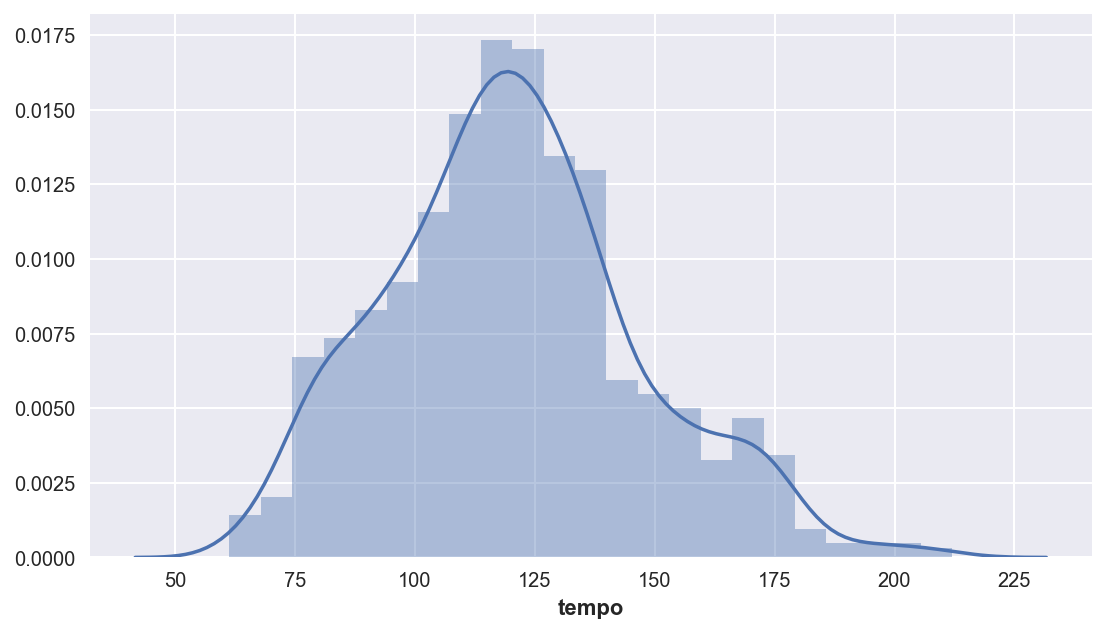

In [6]:

sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(x.tempo)



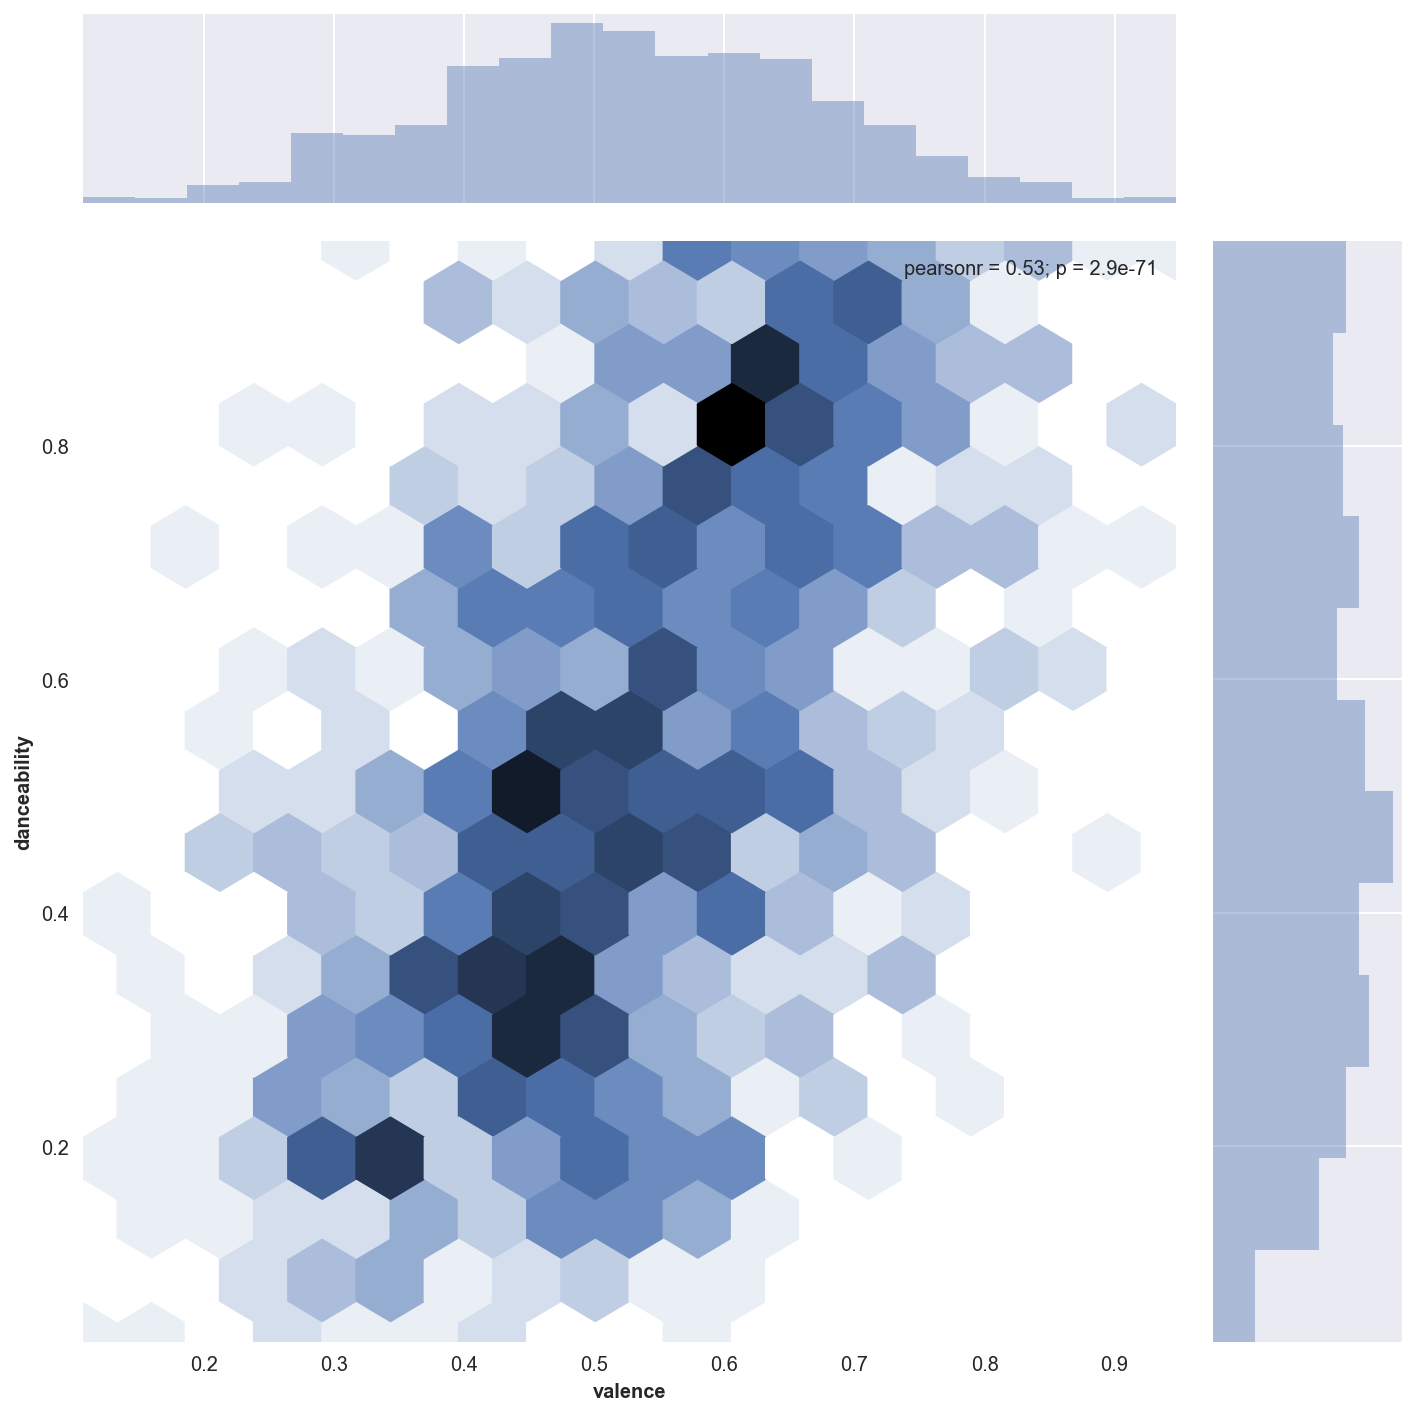

In [7]:
plt.rc("legend", fontsize=10)
sns.set(rc={'figure.figsize':(5,8)})
sns.jointplot(y=x['valence'], x=x['danceability'], kind="hex", color="b", size=10).set_axis_labels("valence", "danceability", fontsize=10)

/Users/c.olmi/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


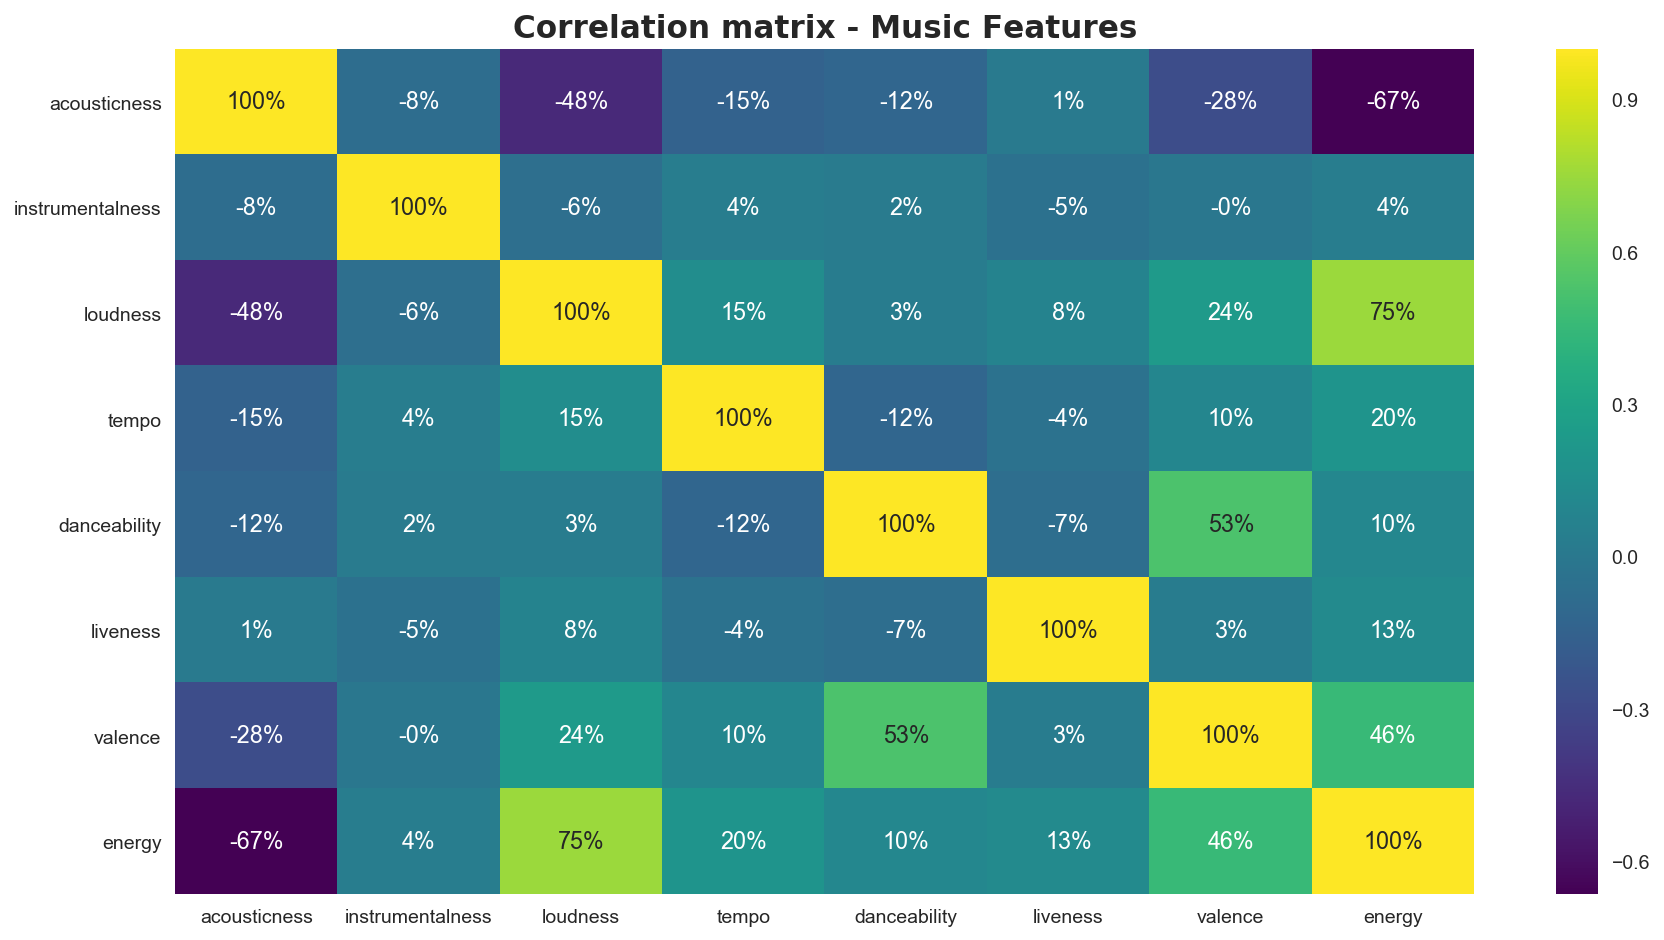

In [8]:
width, height = plt.figaspect(.6)
fig = plt.figure(figsize=(width,height), dpi=70)
plt.title("Correlation matrix - Music Features", fontname='Ubuntu', fontsize=16, fontweight='bold')
sns.heatmap(x.corr(), annot=True, fmt='0.00%', cmap='viridis')

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [10]:
T = pca.transform(x)

In [11]:
# Started with 8 dimensions
x.shape

(977, 8)

In [12]:
# Left with 2 principle components
T.shape

(977, 2)

In [13]:
T

array([[-38.15028948,   1.18270752],
       [  2.21573738,   5.68809712],
       [  7.1717454 ,  -0.66826953],
       ...,
       [-11.78762273,  -3.14318564],
       [-37.84010833,   1.12626952],
       [-22.35326717,  -4.00365598]])

We can use the *explained_variance_ratio_* method of our principle component analysis object to see how much of the variance is explained by each of our principle components vectors.

In [14]:
pca.explained_variance_ratio_

array([0.98140973, 0.01826738])

So just two principle components can explain almost 99% of the variance from these 8 Music features.


## Interpreting Components
We can access the correlations between the components and original variables using the components_ method of our PCA() object.

Interpretation of these relies on finding the most highly correlated components (for this example we’ll use a cut-off of 0.45)


In [29]:
components = pd.DataFrame(pca.components_, columns = x.columns, index=[1, 2])
components

,acousticness,instrumentalness,loudness,tempo,danceability,liveness,valence,energy
1,-0.001744,0.000265,0.020360,0.999789,-0.000671,-0.000222,0.000921,0.001718
2,0.039119,0.003582,-0.997831,0.020479,-0.001962,-0.003635,-0.015622,-0.045941


In [30]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print "Features by importance:\n", important_features

get_important_features(T, pca.components_, x.columns.values)

Features by importance:
[(91.46331929143119, 'tempo'), (16.68084535573509, 'loudness'), (0.7792072194257723, 'energy'), (0.669174486321862, 'acousticness'), (0.2728499214452781, 'valence'), (0.06949251113374248, 'danceability'), (0.06426914609744606, 'instrumentalness'), (0.06370217759506988, 'liveness')]


We see that the most significant features for this PCA are tempo, loudness, energy , as we saw when examining the components_ previously.



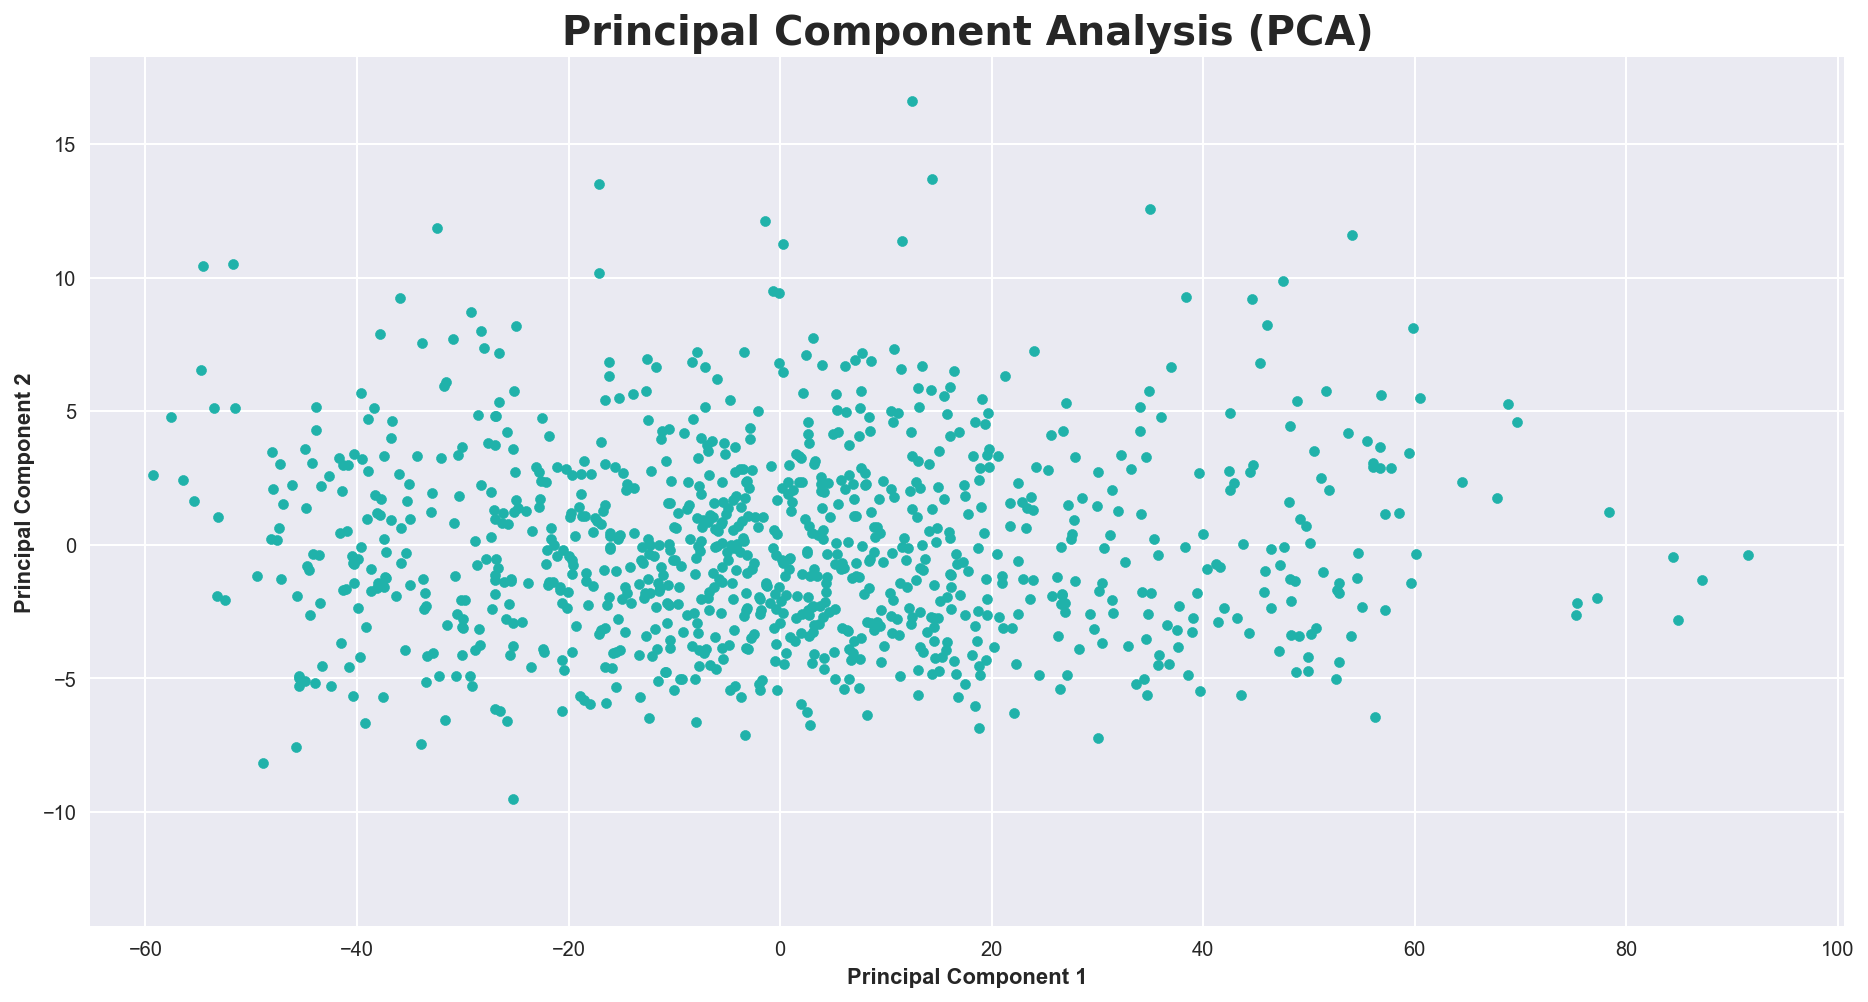

In [31]:
plt.figure(1, figsize=(14, 8),)
plt.title("Principal Component Analysis (PCA)", fontname='DejaVu Sans', fontsize=20, fontweight='bold')
plt.xlim((x_pca[:, 0].min()*1.1, x_pca[:, 0].max()*1.1))
plt.ylim((x_pca[:, 1].min()*1.5, x_pca[:, 1].max()*1.1))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(x_pca[:, 0], x_pca[:, 1], c='lightseagreen', s=25)

In [69]:
x_pca = pca.fit_transform(x)

## TRAINING THE MODEL
Now we're ready to train our model. We do this by calling the fit function from scikit-learn's svm.OneClassSVM. It accepts a few parameters but the most important are nu, kernel, and for the RBF kernel we'll be using, gamma.

* nu is "An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors" and must be between 0 and 1. Basically this means the proportion of outliers we expect in our data. This is an important factor to consider when assessing algorithms. Many unsupervised ML algorithms require you to know (or hint at) the number of outliers or class members you expect.
* kernel is the kernel type to be used. Earlier we discussed SVM's ability to use a non-linear function to project the hyperspace to higher dimension. Setting kernel to something other than linear here will achieve that. The default is rbf (RBF - radial basis function)
* gamma is a parameter of the RBF kernel type and controls the influence of individual training samples - this effects the "smoothness" of the model. A low value improves the smoothness and "generalizability" of the model, while a high value reduces it but makes the model "tighter-fitted" to the training data. Some experimentation is often required to find the best value.
We already know that the proportion of attacks in our data is about 4%. We'll get the precise fraction and use that for nu below. Through experimentation I found an effective gamma to be 0.00005.

In our next cell we'll instantiate a model and fit (train) it with our training data.

In [77]:
#x_pca = pca.fit_transform(x)0.03
import numpy as np
from sklearn import svm
clf = svm.OneClassSVM(kernel="rbf", gamma=0.02, nu=0.65)
clf.fit(x_pca)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.02, kernel='rbf',
      max_iter=-1, nu=0.65, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

# The goal of a support vector machine is to find the optimal separating hyperplane which maximises the margin of the training data.

### Given a particular hyperplane, we can compute the distance between the hyperplane and the closest data point. Once we have this value, if we double it we will get what is called the margin.

There will never be any data point inside the margin. (Note: this can cause some problems when data is noisy, and this is why soft margin classifier will be introduced later)


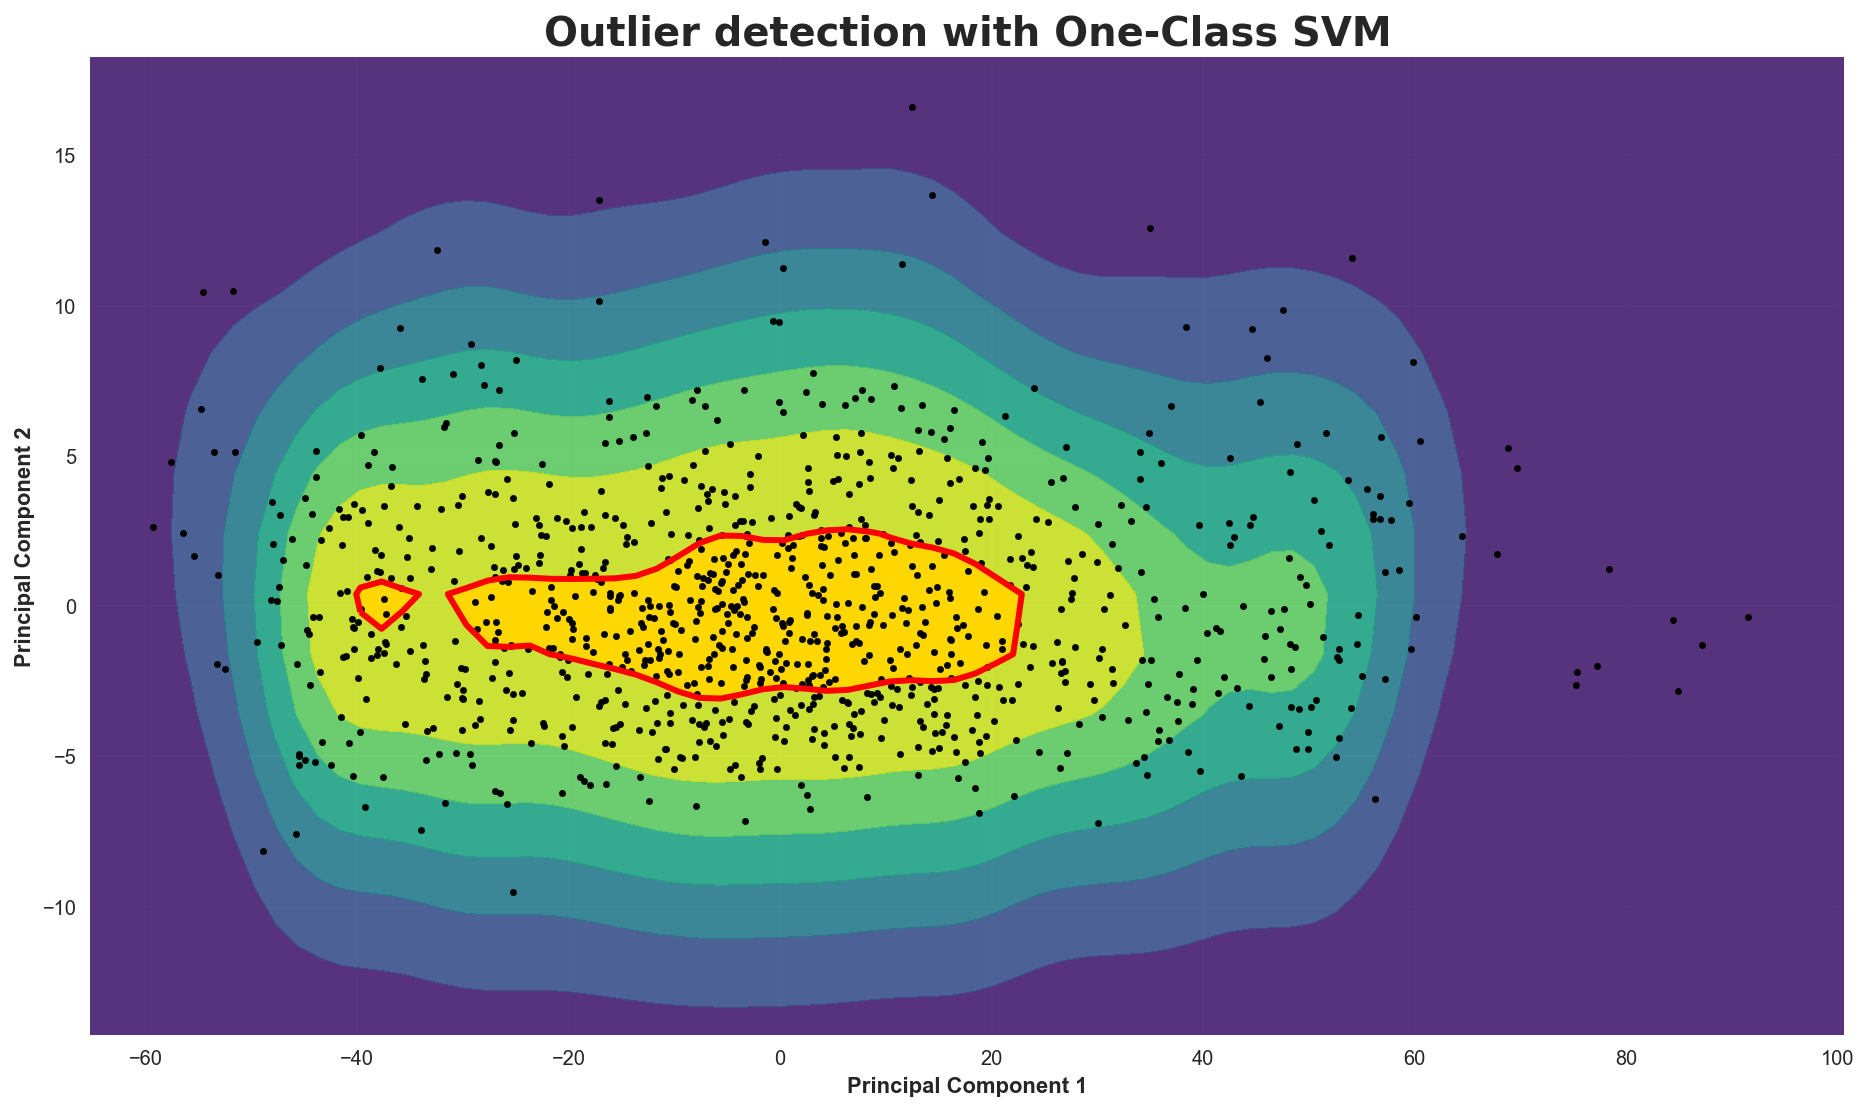

In [78]:
xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500))
# plot the line, the points, and the nearest vectors to the plane

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(14, 9),)
plt.title("Outlier detection with One-Class SVM", fontname='DejaVu Sans', fontsize=20, fontweight='bold')


plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.viridis, alpha=.9)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red') #linestyle = ':'
plt.contourf(xx, yy, Z, levels=[0, Z.max()],colors='gold')

b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='black', s=10)
#plt.axis('tight')
plt.xlim((x_pca[:, 0].min()*1.1, x_pca[:, 0].max()*1.1))
plt.ylim((x_pca[:, 1].min()*1.5, x_pca[:, 1].max()*1.1))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#visualize song titles


plt.show()

In [79]:
artist = 'The Doors'

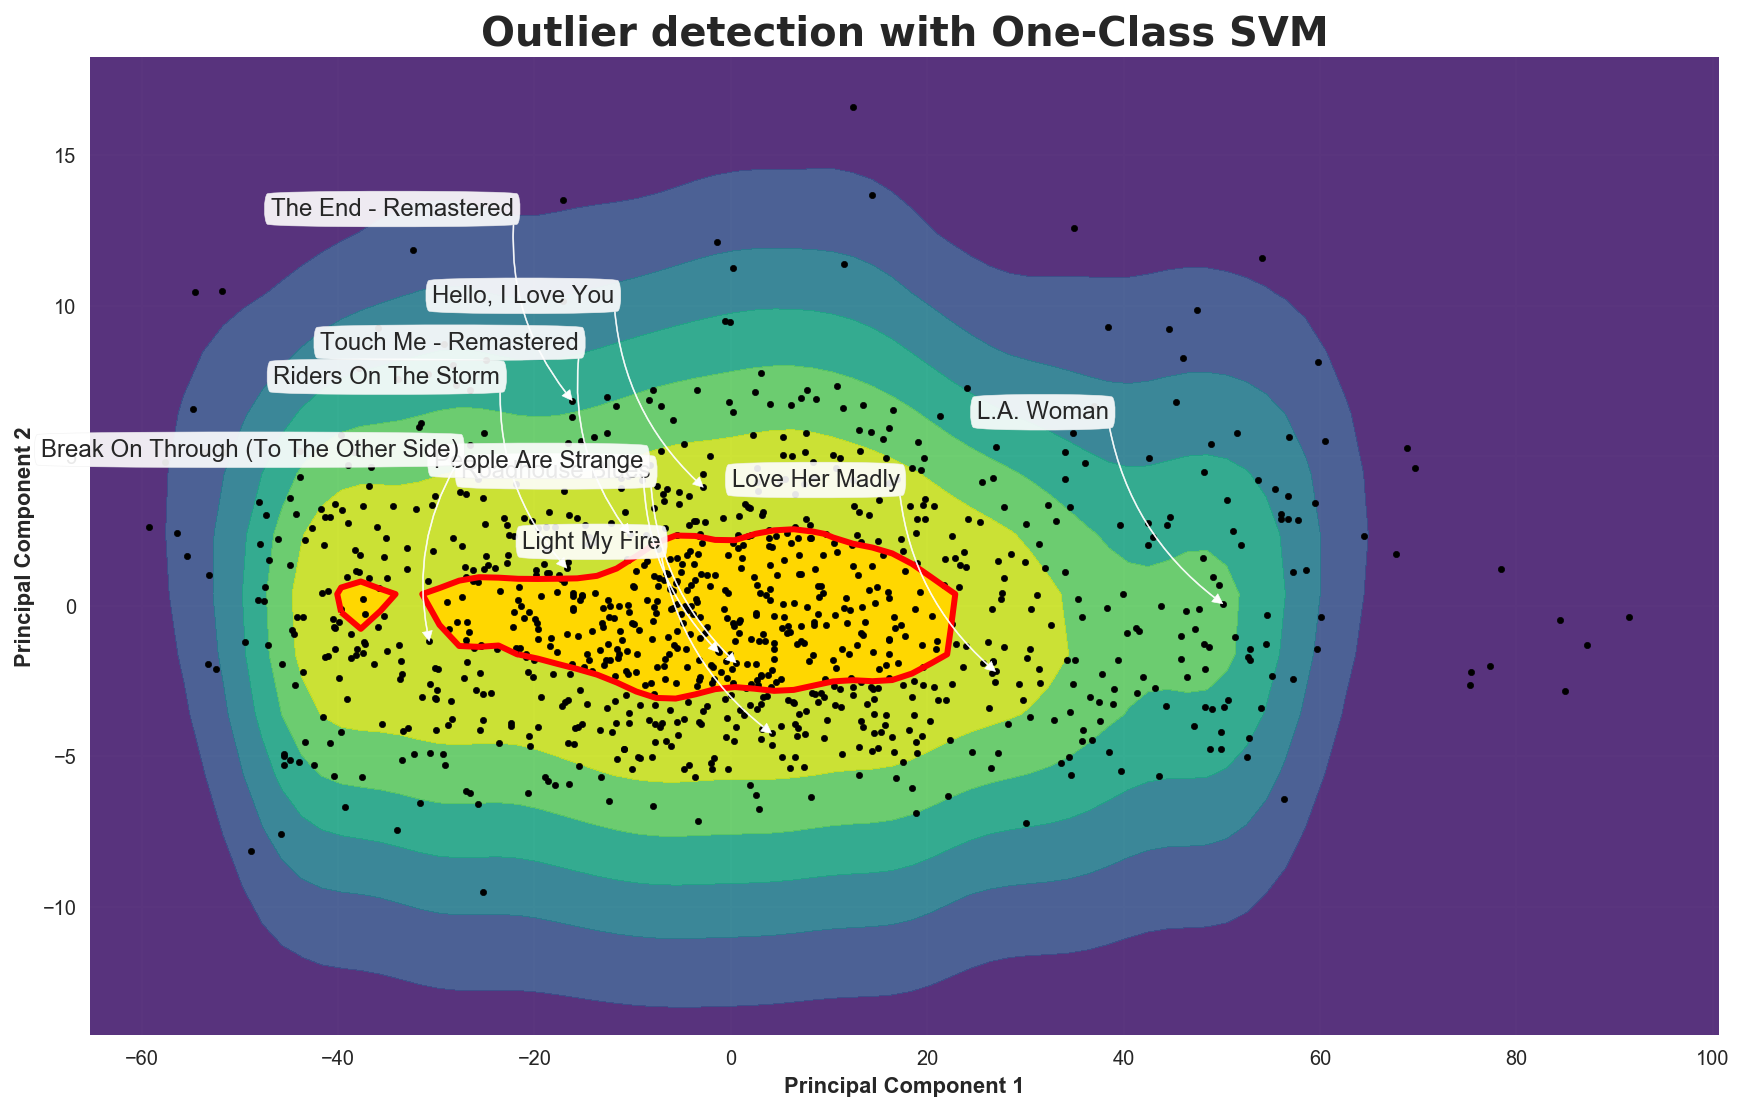

In [80]:
xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500))
# plot the line, the points, and the nearest vectors to the plane

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(13, 9),)
plt.title("Outlier detection with One-Class SVM", fontname='DejaVu Sans', fontsize=20, fontweight='bold')


plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.viridis, alpha=.9)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red') #linestyle = ':'
plt.contourf(xx, yy, Z, levels=[0, Z.max()],colors='gold')

b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='black', s=10)
#plt.axis('tight')
plt.xlim((x_pca[:, 0].min()*1.1, x_pca[:, 0].max()*1.1))
plt.ylim((x_pca[:, 1].min()*1.5, x_pca[:, 1].max()*1.1))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#visualize song titles

for row_id in range(0, len(df)):
    if (ds.artist_name[row_id] in [artist]):
        target_word = ds.track_name[row_id]
        xxx = x_pca[row_id, 0]
        yyy = x_pca[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=12, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.9),
            arrowprops=dict( headwidth = 5 , width = 0.5 , headlength = 5,  connectionstyle='arc3,rad=0.2', 
                            color='white'))


plt.show()

In [81]:
da = pd.read_csv('playlist_data2.csv')
da.tail()

,acousticness,analysis_url,danceability,duration_ms,energy,id_x,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,track_id,track_name,artist_name,track_popularity,track_duration_ms,id_y
25,0.000645,https://api.spotify.com/v1/audio-analysis/00Eq...,0.313,281078,0.784,00Eqx1s9x5lcni8t0gnONc,0.4860,2,0.0745,-6.309,...,https://api.spotify.com/v1/tracks/00Eqx1s9x5lc...,audio_features,spotify:track:00Eqx1s9x5lcni8t0gnONc,0.432,00Eqx1s9x5lcni8t0gnONc,Get Right,Arcade Fire,48,281077,00Eqx1s9x5lcni8t0gnONc
26,0.077100,https://api.spotify.com/v1/audio-analysis/4HFL...,0.573,301400,0.645,4HFL4WyH8gdR4eFof9mdoU,0.0148,8,0.1050,-7.248,...,https://api.spotify.com/v1/tracks/4HFL4WyH8gdR...,audio_features,spotify:track:4HFL4WyH8gdR4eFof9mdoU,0.478,4HFL4WyH8gdR4eFof9mdoU,We Used To Wait,Arcade Fire,27,301400,4HFL4WyH8gdR4eFof9mdoU
27,0.328000,https://api.spotify.com/v1/audio-analysis/6ou5...,0.474,209093,0.909,6ou52ORfwL6bB7yN60ixWa,0.0197,2,0.0875,-6.286,...,https://api.spotify.com/v1/tracks/6ou52ORfwL6b...,audio_features,spotify:track:6ou52ORfwL6bB7yN60ixWa,0.249,6ou52ORfwL6bB7yN60ixWa,Keep the Car Running,Arcade Fire,7,209093,6ou52ORfwL6bB7yN60ixWa
28,0.007310,https://api.spotify.com/v1/audio-analysis/3hDp...,0.567,343784,0.506,3hDpkvXDbmcrKya8CUS6lN,0.2050,1,0.1030,-8.742,...,https://api.spotify.com/v1/tracks/3hDpkvXDbmcr...,audio_features,spotify:track:3hDpkvXDbmcrKya8CUS6lN,0.358,3hDpkvXDbmcrKya8CUS6lN,We Exist,Arcade Fire,45,343784,3hDpkvXDbmcrKya8CUS6lN
29,0.305000,https://api.spotify.com/v1/audio-analysis/66z0...,0.302,287360,0.495,66z0olTFJXbrBvbrsOGEsu,0.0827,0,0.2160,-8.690,...,https://api.spotify.com/v1/tracks/66z0olTFJXbr...,audio_features,spotify:track:66z0olTFJXbrBvbrsOGEsu,0.302,66z0olTFJXbrBvbrsOGEsu,My Body Is A Cage,Arcade Fire,30,287360,66z0olTFJXbrBvbrsOGEsu


In [82]:
artist = 'Arcade Fire'

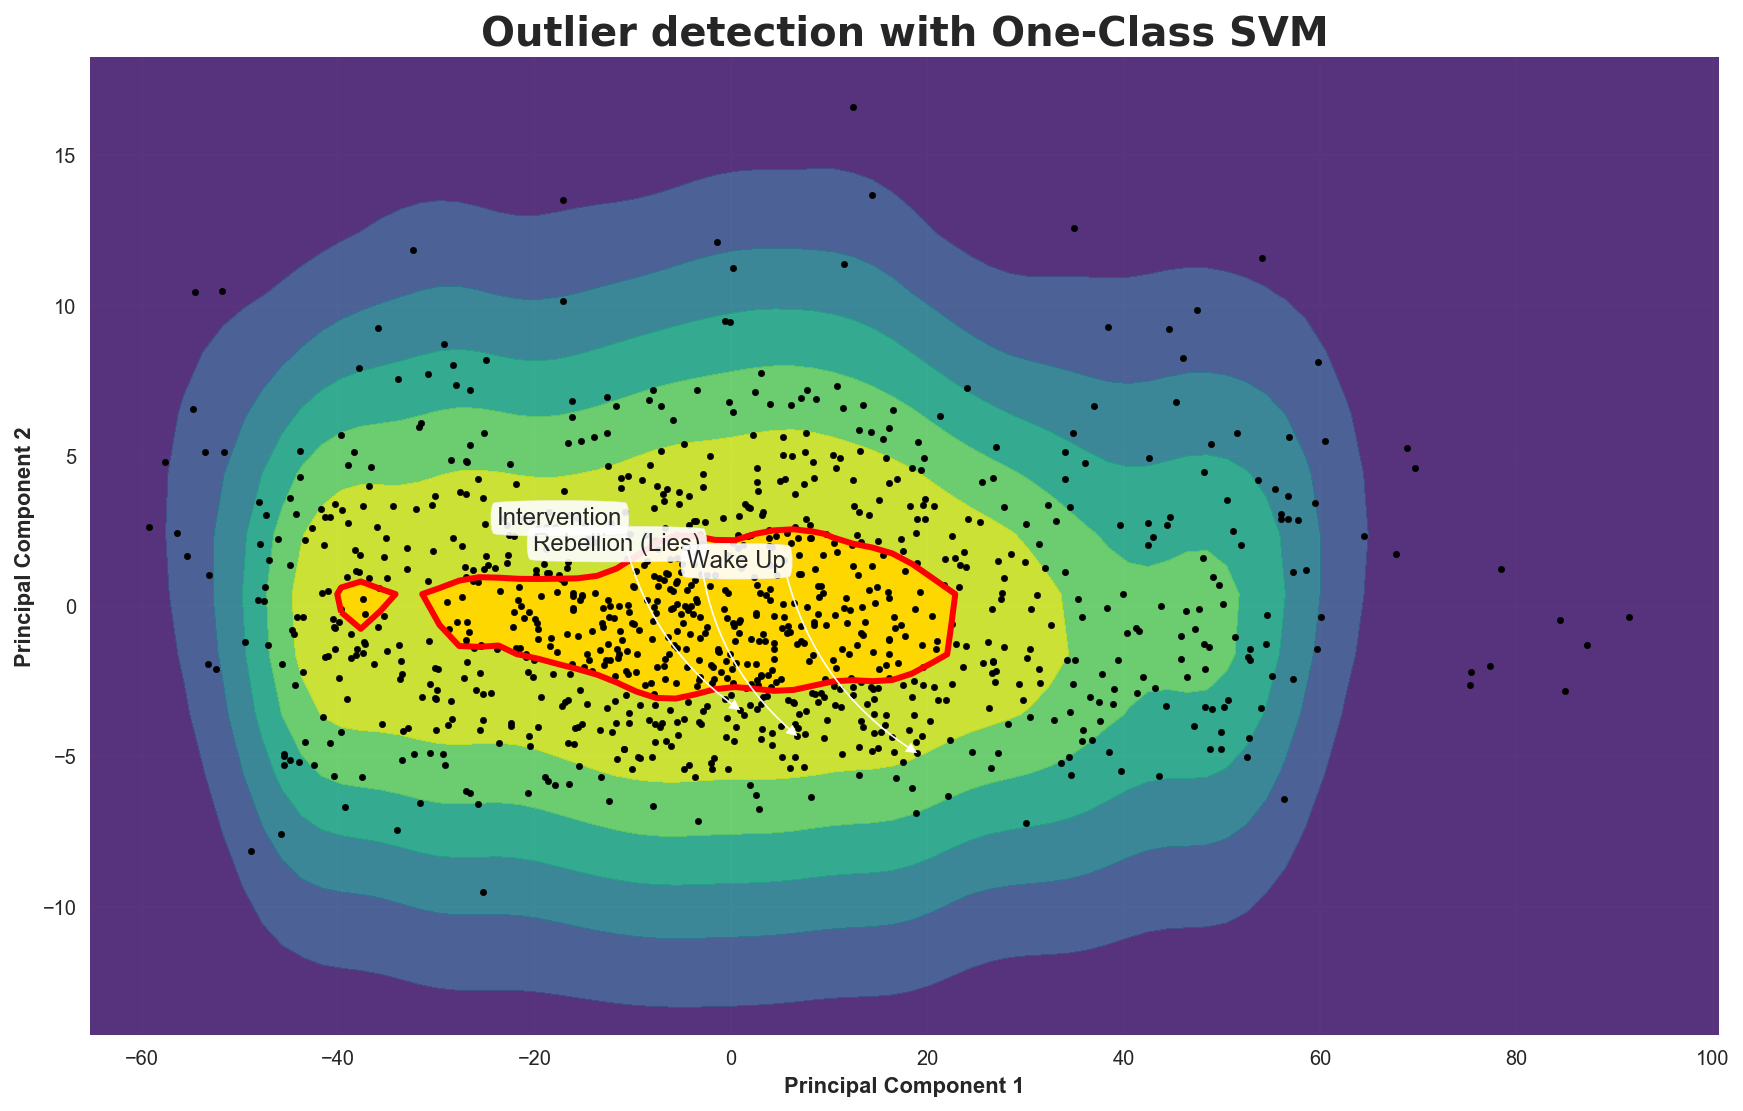

In [83]:
xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500))
# plot the line, the points, and the nearest vectors to the plane

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(13, 9),)
plt.title("Outlier detection with One-Class SVM", fontname='DejaVu Sans', fontsize=20, fontweight='bold')


plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.viridis, alpha=.9)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red') #linestyle = ':'
plt.contourf(xx, yy, Z, levels=[0, Z.max()],colors='gold')

b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='black', s=10)
#plt.axis('tight')
plt.xlim((x_pca[:, 0].min()*1.1, x_pca[:, 0].max()*1.1))
plt.ylim((x_pca[:, 1].min()*1.5, x_pca[:, 1].max()*1.1))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#visualize song titles

for row_id in range(0, len(df)):
    if (ds.artist_name[row_id] in [artist]):
        target_word = ds.track_name[row_id]
        xxx = x_pca[row_id, 0]
        yyy = x_pca[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=12, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.9),
            arrowprops=dict( headwidth = 5 , width = 0.5 , headlength = 5,  connectionstyle='arc3,rad=0.2', 
                            color='white'))


plt.show()

In [84]:

t = da[[ 'acousticness', 'instrumentalness', 'loudness', 'tempo','danceability', 'liveness' ,'valence', 'energy']]
t.head(5)

,acousticness,instrumentalness,loudness,tempo,danceability,liveness,valence,energy
0,0.5410,0.02010,-6.484,123.067,0.604,0.7520,0.645,0.768
1,0.0703,0.02570,-6.152,117.611,0.611,0.3370,0.458,0.681
2,0.1340,0.03630,-4.792,138.269,0.258,0.0945,0.273,0.801
3,0.0124,0.00158,-6.434,99.975,0.515,0.1110,0.201,0.809
4,0.1040,0.03190,-5.505,116.029,0.640,0.2210,0.717,0.876


In [85]:
t_pca = pca.fit_transform(t)

In [86]:
#x_pca = pca.fit_transform(x)
import numpy as np
from sklearn import svm
clf = svm.OneClassSVM(kernel="rbf", gamma=0.03, nu=0.65)
clf.fit(x_pca)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.03, kernel='rbf',
      max_iter=-1, nu=0.65, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

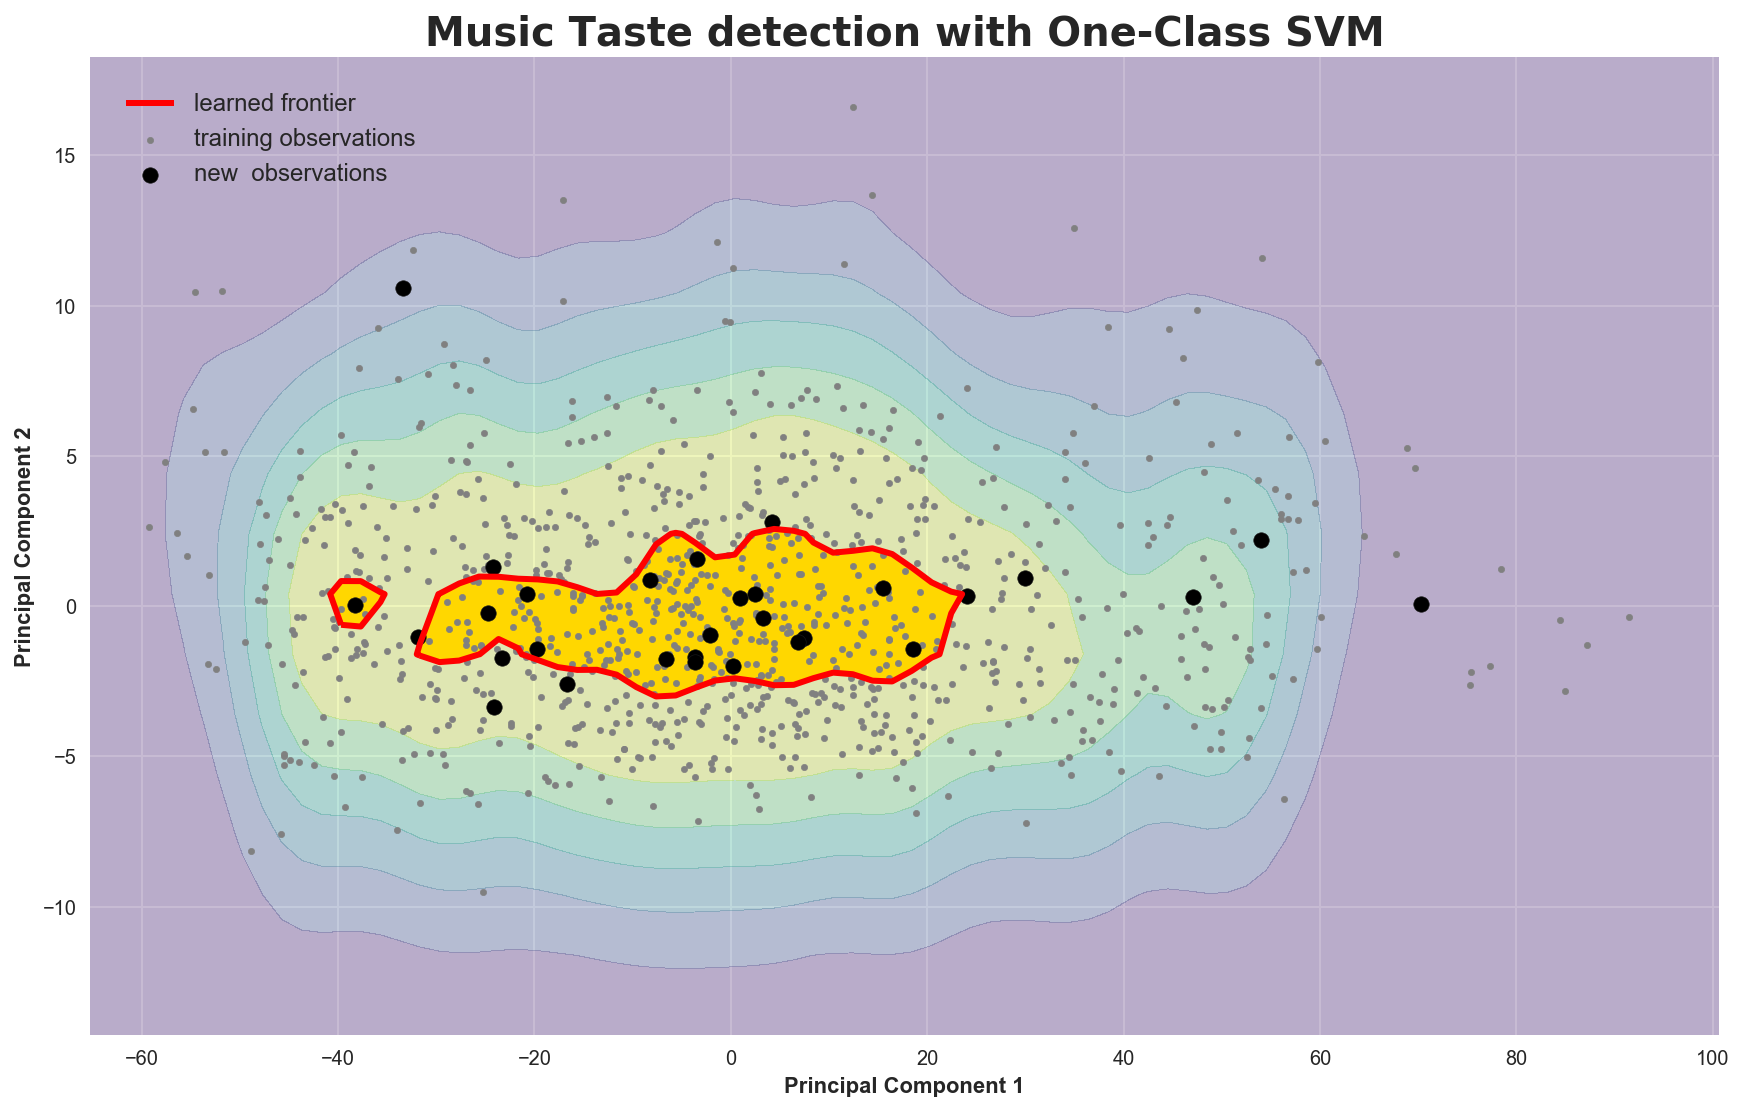

In [192]:
xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500))
# plot the line, the points, and the nearest vectors to the plane

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(13, 9),)
plt.title("Music Taste detection with One-Class SVM", fontname='DejaVu Sans', fontsize=20, fontweight='bold')



plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.viridis, alpha=.3)


# Trainig Observations
a = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red') #linestyle = ':'
plt.contourf(xx, yy, Z, levels=[0, Z.max()],colors='gold')

b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='gray', s=10)
#plt.axis('tight')
plt.xlim((x_pca[:, 0].min()*1.1, x_pca[:, 0].max()*1.1))
plt.ylim((x_pca[:, 1].min()*1.5, x_pca[:, 1].max()*1.1))



# New Observations
b2 = plt.scatter(t_pca[:, 0], t_pca[:, 1], c='black', s=60,
                 edgecolors='k')



plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#visualize song titles
    

plt.legend([a.collections[0], b1, b2],
           ["learned frontier", "training observations",
            "new  observations"],
           loc="upper left", prop={'size': 12},
          # prop=matplotlib.font_manager.FontProperties(size=11),
           fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

In [206]:
clf.fit(x_pca)
aa = clf.fit(x_pca)
y_pred_test = clf.predict(t_pca)

In [208]:
dx = pd.DataFrame(y_pred_test, columns=['Do you like it?'])
result = pd.concat([da, dx], axis=1)
def func(row):
    if row['Do you like it?'] == 1:
        return 'True'
    elif row['Do you like it?'] ==-1:
        return 'False' 
  

result['Do you like it?'] = result.apply(func, axis=1)
result = result[['track_name','Do you like it?', 'id_x']]
result 

,track_name,Do you like it?,id_x
0,Put Your Money on Me,True,0SaEmR2rdtfsZawPjMYkWg
1,The Suburbs,True,7HCj6qN0tG2HN1eLQyWUBg
2,Wake Up,True,2uljPrNySotVP1d42B30X2
3,Sprawl II (Mountains Beyond Mountains),True,2GO8ZpAPxr1obsQ9PqSQc5
4,Afterlife,True,2sq3NDMw4rpW7fQem1qe9N
5,Everything Now,True,07Ugv4TA7PvQfoqetnmLrS
6,Ready to Start,False,1F2Ca0Cfo7DcdieWlZEqzc
7,Reflektor,True,36FaicbcQqoLXBBqTW76Zk
8,Chemistry,False,7kIwVGX93RF6c8ZLKpeiNN
9,Peter Pan,False,0LOnyr7dtH8GQAVypvT98T


In [209]:
result.groupby('Do you like it?').count()

,track_name,id_x
Do you like it?,,
False,10,10
True,20,20


In [212]:
result['id_x'][0]

'0SaEmR2rdtfsZawPjMYkWg'

In [213]:
%%html
<iframe src="https://open.spotify.com/embed?uri=spotify:track:00Eqx1s9x5lcni8t0gnONc" width="300" height="380" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>